In [2]:
#import dependencies
import pandas as pd
import matplotlib as plt
import numpy as np
import time
from datetime import datetime

In [3]:
#create random coordinates 

lats = np.random.uniform(low = -90, high = 90, size = 1500)
lngs = np.random.uniform(low = -180, high = 180, size = 1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
url = 'https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=' + weather_api_key 

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | severo-kurilsk
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | savannah bight
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | weinan
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | new norfolk
Processing Record 9 of Set 1 | galgani
City not found. Skipping...
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | tuktoyaktuk
Processing Record 12 of Set 1 | longyearbyen
Processing Record 13 of Set 1 | marshall
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | miracema do tocantins
Processing Record 17 of Set 1 | caravelas
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | broken hill
Processing Record 21 of Set 1 | barrow
Processing Record 22 of Set 1

Processing Record 36 of Set 4 | mahibadhoo
Processing Record 37 of Set 4 | salalah
Processing Record 38 of Set 4 | bhuj
Processing Record 39 of Set 4 | pontianak
Processing Record 40 of Set 4 | mount gambier
Processing Record 41 of Set 4 | cabo san lucas
Processing Record 42 of Set 4 | inirida
Processing Record 43 of Set 4 | guthrie
Processing Record 44 of Set 4 | faanui
Processing Record 45 of Set 4 | el mahalla el kubra
City not found. Skipping...
Processing Record 46 of Set 4 | baglan
Processing Record 47 of Set 4 | karkaralinsk
City not found. Skipping...
Processing Record 48 of Set 4 | nicoya
Processing Record 49 of Set 4 | emerald
Processing Record 50 of Set 4 | zolotinka
City not found. Skipping...
Processing Record 1 of Set 5 | carnarvon
Processing Record 2 of Set 5 | husavik
Processing Record 3 of Set 5 | namatanai
Processing Record 4 of Set 5 | nanortalik
Processing Record 5 of Set 5 | chumikan
Processing Record 6 of Set 5 | sitka
Processing Record 7 of Set 5 | nizhneyansk
Ci

Processing Record 23 of Set 8 | cidreira
Processing Record 24 of Set 8 | nampula
Processing Record 25 of Set 8 | morro bay
Processing Record 26 of Set 8 | bilma
Processing Record 27 of Set 8 | wanning
Processing Record 28 of Set 8 | maltahohe
Processing Record 29 of Set 8 | rio maior
Processing Record 30 of Set 8 | port hedland
Processing Record 31 of Set 8 | biltine
Processing Record 32 of Set 8 | horasan
Processing Record 33 of Set 8 | tahoua
Processing Record 34 of Set 8 | puerto el triunfo
Processing Record 35 of Set 8 | xam nua
Processing Record 36 of Set 8 | tubruq
City not found. Skipping...
Processing Record 37 of Set 8 | jambi
Processing Record 38 of Set 8 | sao jose da coroa grande
Processing Record 39 of Set 8 | leninskoye
Processing Record 40 of Set 8 | cabedelo
Processing Record 41 of Set 8 | guadalajara
Processing Record 42 of Set 8 | gazanjyk
Processing Record 43 of Set 8 | alofi
Processing Record 44 of Set 8 | saint-georges
Processing Record 45 of Set 8 | lagoa
Processi

Processing Record 14 of Set 12 | hvolsvollur
Processing Record 15 of Set 12 | shimoda
Processing Record 16 of Set 12 | krasnoarmeysk
Processing Record 17 of Set 12 | honningsvag
Processing Record 18 of Set 12 | pacific grove
Processing Record 19 of Set 12 | obigarm
Processing Record 20 of Set 12 | riviere-au-renard
Processing Record 21 of Set 12 | wesselsbron
Processing Record 22 of Set 12 | deputatskiy
Processing Record 23 of Set 12 | puerto leguizamo
Processing Record 24 of Set 12 | santa isabel do rio negro
Processing Record 25 of Set 12 | nata
Processing Record 26 of Set 12 | uruzgan
Processing Record 27 of Set 12 | saldanha
Processing Record 28 of Set 12 | thai binh
Processing Record 29 of Set 12 | bichura
Processing Record 30 of Set 12 | george town
Processing Record 31 of Set 12 | wajir
Processing Record 32 of Set 12 | bac lieu
Processing Record 33 of Set 12 | sumenep
Processing Record 34 of Set 12 | utiroa
City not found. Skipping...
Processing Record 35 of Set 12 | roquetas de

In [11]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Severo-Kurilsk,50.6789,156.1250,30.34,68,99,26.75,RU,2022-04-03 03:11:04
1,Jamestown,42.0970,-79.2353,35.24,63,0,6.91,US,2022-04-03 03:07:46
2,Savannah Bight,16.4500,-85.8500,80.71,83,1,25.70,HN,2022-04-03 03:11:04
3,Ushuaia,-54.8000,-68.3000,37.06,87,20,6.91,AR,2022-04-03 03:11:05
4,Bethel,41.3712,-73.4140,42.94,64,0,0.00,US,2022-04-03 03:11:05
5,Weinan,34.5036,109.5089,61.36,33,0,7.18,CN,2022-04-03 03:11:06
6,Punta Arenas,-53.1500,-70.9167,42.91,81,0,12.66,CL,2022-04-03 03:11:06
7,New Norfolk,-42.7826,147.0587,62.92,46,17,3.49,AU,2022-04-03 03:11:07
8,Mataura,-46.1927,168.8643,62.64,58,30,7.85,NZ,2022-04-03 03:11:07
9,Tuktoyaktuk,69.4541,-133.0374,-6.27,97,100,3.58,CA,2022-04-03 03:11:08


In [12]:
city_data_df = city_data_df[['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Severo-Kurilsk,RU,2022-04-03 03:11:04,50.6789,156.1250,30.34,68,99,26.75
1,Jamestown,US,2022-04-03 03:07:46,42.0970,-79.2353,35.24,63,0,6.91
2,Savannah Bight,HN,2022-04-03 03:11:04,16.4500,-85.8500,80.71,83,1,25.70
3,Ushuaia,AR,2022-04-03 03:11:05,-54.8000,-68.3000,37.06,87,20,6.91
4,Bethel,US,2022-04-03 03:11:05,41.3712,-73.4140,42.94,64,0,0.00
...,...,...,...,...,...,...,...,...,...
554,Mehriz,IR,2022-04-03 03:31:27,31.5917,54.4318,57.70,13,0,2.64
555,Mongar,BT,2022-04-03 03:31:28,27.2747,91.2396,66.79,63,79,5.06
556,Karsava,LV,2022-04-03 03:31:28,56.7841,27.6883,24.06,84,17,7.92
557,Terney,RU,2022-04-03 03:31:29,45.0503,136.6092,49.50,48,2,12.01


In [51]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [52]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

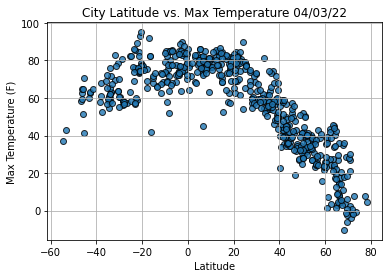

In [53]:
#build scatter plot for latitude vs max temp 
import matplotlib.pyplot as plt
plt.scatter(lats, max_temps,
           edgecolor = 'black', linewidths = 1, marker = 'o',
           alpha = .8, label = 'Cities')

plt.title(f'City Latitude vs. Max Temperature ' + time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('weather_data/Fig1.png')

plt.show()

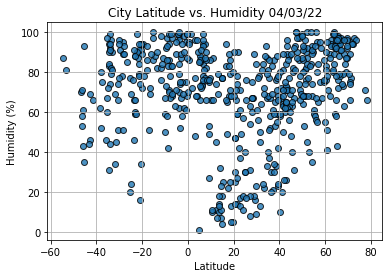

In [54]:
#build scatter plot for latitude vs humidity 
plt.scatter(lats, humidity,
           edgecolor = 'black', linewidths = 1, marker = 'o',
           alpha = .8, label = 'Cities')

plt.title(f'City Latitude vs. Humidity ' + time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('weather_data/Fig2.png')

plt.show()

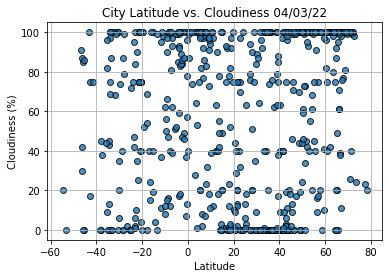

In [55]:
#build a scatter plot for latitude vs cloudiness
plt.scatter(lats, cloudiness,
           edgecolor = 'black', linewidths = 1, marker = 'o',
           alpha = .8, label = 'Cities')

plt.title(f'City Latitude vs. Cloudiness ' + time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('weather_data/Fig3.png')

plt.show()

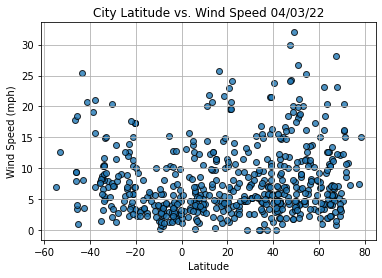

In [56]:
#build a scatter plot for latitude vs cloudiness
plt.scatter(lats, wind_speed,
           edgecolor = 'black', linewidths = 1, marker = 'o',
           alpha = .8, label = 'Cities')

plt.title(f'City Latitude vs. Wind Speed ' + time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('weather_data/Fig4.png')

plt.show()

In [57]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.show()

In [58]:
index13 = city_data_df.loc[13]
index13

City                        Vaini
Country                        TO
Date          2022-04-03 03:11:10
Lat                         -21.2
Lng                        -175.2
Max Temp                    84.36
Humidity                       79
Cloudiness                     75
Wind Speed                   5.75
Name: 13, dtype: object

In [59]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4       True
       ...  
554     True
555     True
556     True
557     True
558    False
Name: Lat, Length: 559, dtype: bool

In [60]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

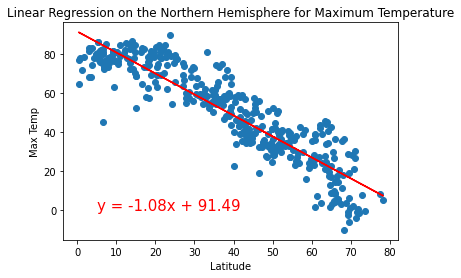

In [61]:
#linear regression on the Northern hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
# call function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp', (5,0))


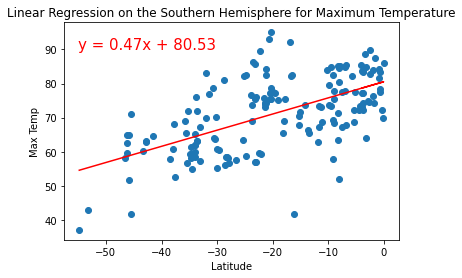

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-55,90))

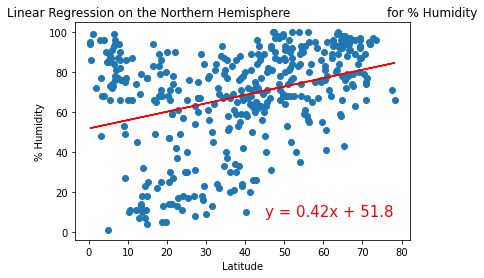

In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(45,8))

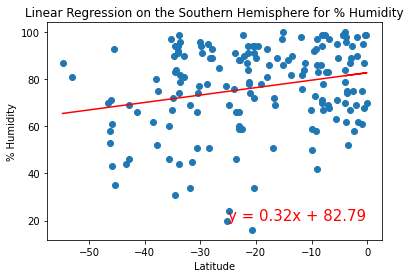

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-25,20))

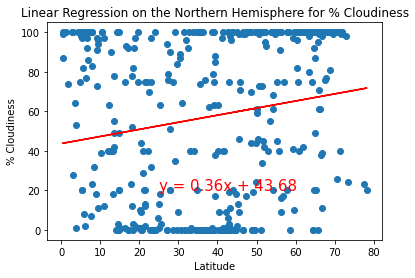

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(25,20))

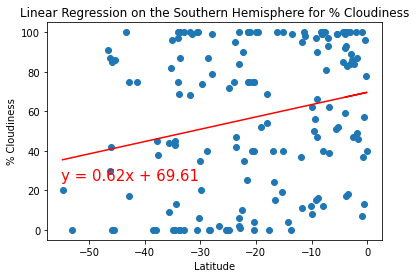

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-55,25))

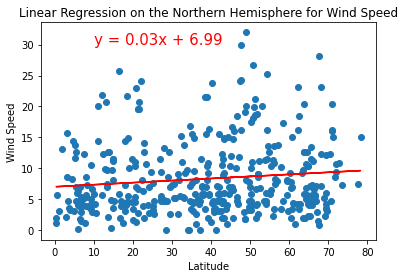

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(10,30))

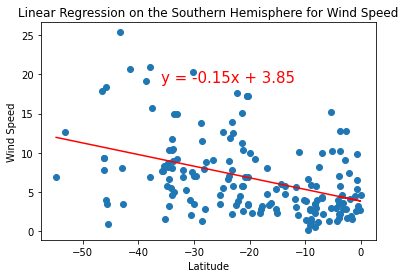

In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-36,19))